In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import os


In [41]:
def read_output(filename):
    arr = []
    with open(filename) as f:
        for line in f:
            if not line.strip():
                continue;
            if not line.startswith('{'):
                elm = line.strip().split(' ')
                int_elm = [int(elm) for elm in elm]
                arr.append(int_elm)
    return arr

In [42]:
def visualize_output(output):
    w = output[0][0]
    l = output[0][1]
    n = output[1][0]
    roation = output[-1]
    if len(roation) != n:
            roation = [0]*n
            output.append(roation)
    elif n==4:
            if not all([ r == 0 or r == 1 for r in roation ]):
                roation = [0]*n
                output.append(roation)

    colors = np.array(['red', 'green', 'blue', 'yellow', 'orange', 'pink', 'purple', 'brown']*(math.ceil(n/8)))


    fig = plt.figure(figsize=(w/2, l/2))
    ax = fig.gca()
    ax.set_xticks(np.arange(0, w+1, 1))
    ax.set_yticks(np.arange(0, l+1, 1))
    plt.grid()
    for i, [width, height, x, y] in enumerate(np.array(output[2:-1])):
        rect = patches.Rectangle((x, y), width, height, linewidth=3, edgecolor='black', facecolor=colors[i])
        ax.add_patch(rect)
        ax.text(x+width/2-0.7, y+height/2, 'Rotated' if roation[i] else '')
    plt.show()
    return fig

[[8, 8], [4], [3, 3, 0, 0], [3, 5, 0, 3], [5, 3, 3, 0], [5, 5, 3, 3]]


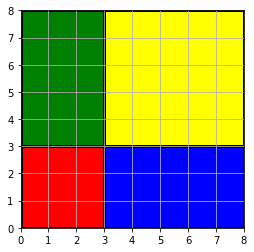

In [43]:
filename = 'VLSIdesign/sol_ins-1.txt'
file_path = os.path.join("cp_solutions", filename)

output = read_output(file_path)
output
f = visualize_output(output)